
Business Objectives:

Predicting Loss Given Default (LGD): The primary business objective is to develop a predictive model for Loss Given Default (LGD) for defaulted accounts. LGD represents the proportion of the exposure that a lender is unable to recover after a borrower defaults. Accurate prediction of LGD is crucial for risk management and financial planning.

Performance Evaluation: Evaluate the predictive model based on a defined performance metric. The performance metric should align with business goals and accurately measure the model's effectiveness in predicting LGD.

Understanding Data Sets: Gain a deep understanding of the provided data sets, including variables, data types, and distributions. Recognize the relevance of each variable to LGD prediction. This understanding is essential for building a meaningful and accurate model.

Data Aggregation and Merging: Aggregate and merge relevant information from the collection data set to enhance the predictive power of the model. The merged data should provide comprehensive insights into the factors affecting LGD.

Data Types and Quality: Ensure accurate identification of variable data types to prevent datatype mismatch errors. Clean and preprocess the data to handle missing values, outliers, or any issues that might negatively impact the model's performance.

Feature Engineering and Extraction: Conduct feature engineering and extraction to create new variables that could enhance the model's predictive capabilities. Introduce features that capture the intricacies of defaulted accounts and contribute to a more accurate LGD prediction.

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [137]:
import warnings
warnings.filterwarnings("ignore")

In [279]:
#importing the datasets
df_main = pd.read_csv("main_loan_base.csv")
df_repayment = pd.read_csv("repayment_base.csv")
df_monthly_balance = pd.read_csv("monthly_balance_base.csv")

In [280]:
#insepcting the mains dataset
df_main.head()

,loan_acc_num,customer_name,customer_address,loan_type,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,disbursal_date,default_date
0,LN79307711,Aarna Sura,"09/506, Anand Path, Ongole 646592",Consumer-Durable,21916,4929.47,3,0,3,127,2,10.1,1012.32,2019-04-14,2020-07-31
1,LN88987787,Amira Konda,"11, Dhaliwal Circle\nRaichur 659460",Two-Wheeler,121184,10254.50,1,0,0,156,2,11.8,5693.24,2015-04-14,2016-07-30
2,LN78096023,Eshani Khosla,H.No. 31\nAtwal Street\nKatihar-037896,Car,487036,116183.86,0,1,10,22,3,14.6,16788.02,2015-01-10,2015-04-18
3,LN56862431,Divij Kala,"766, Gulati Marg\nPudukkottai-051396",Two-Wheeler,52125,10310.05,5,2,9,30,2,9.6,2395.69,2018-02-07,2018-09-13
4,LN77262680,Vaibhav Bir,"55/73, Sachdev Marg\nDharmavaram-332966",Consumer-Durable,8635,1051.25,0,1,3,62,2,9.6,396.87,2014-12-25,2016-02-20


In [281]:
#Checking for nulls
null_perc= df_main.isnull().sum().sort_values(ascending=False)/len(df_main.index)*100
null_perc

loan_acc_num         0.0
customer_name        0.0
customer_address     0.0
loan_type            0.0
loan_amount          0.0
collateral_value     0.0
cheque_bounces       0.0
number_of_loans      0.0
missed_repayments    0.0
vintage_in_months    0.0
tenure_years         0.0
interest             0.0
monthly_emi          0.0
disbursal_date       0.0
default_date         0.0
dtype: float64

In [282]:
#Checking the variables of mains dataset
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_acc_num       50000 non-null  object 
 1   customer_name      50000 non-null  object 
 2   customer_address   50000 non-null  object 
 3   loan_type          50000 non-null  object 
 4   loan_amount        50000 non-null  int64  
 5   collateral_value   50000 non-null  float64
 6   cheque_bounces     50000 non-null  int64  
 7   number_of_loans    50000 non-null  int64  
 8   missed_repayments  50000 non-null  int64  
 9   vintage_in_months  50000 non-null  int64  
 10  tenure_years       50000 non-null  int64  
 11  interest           50000 non-null  float64
 12  monthly_emi        50000 non-null  float64
 13  disbursal_date     50000 non-null  object 
 14  default_date       50000 non-null  object 
dtypes: float64(3), int64(6), object(6)
memory usage: 5.7+ MB


The columns disbursal date and default date are stored as object data type, we need to convert them to date time format

In [283]:
#Checking shape
df_main.shape

(50000, 15)

In [284]:
#Dropping Duplicates in loan_acc_num
df_main=df_main.drop_duplicates(subset="loan_acc_num")

In [285]:
#Checking shape after dropping duplicates
df_main.shape

(49985, 15)

In [286]:
#insepcting the repayment dataset
df_repayment.head()

,loan_acc_num,repayment_amount,repayment_date
0,LN79307711,1012.320000,2019-05-18
1,LN79307711,667.987539,2019-06-20
2,LN79307711,1012.320000,2019-07-16
3,LN79307711,1012.320000,2019-08-16
4,LN79307711,1012.320000,2019-09-22


In [287]:
#Checking shape of repayment dataset
df_repayment.shape

(626601, 3)

In [288]:
#Checking for nulls
null_perc= df_repayment.isnull().sum().sort_values(ascending=False)/len(df_repayment.index)*100
null_perc

loan_acc_num        0.0
repayment_amount    0.0
repayment_date      0.0
dtype: float64

In [289]:
#Aggregating the repayment amount by loan account number
df_repayment=df_repayment.groupby('loan_acc_num').sum()

In [290]:
df_repayment.head()

,repayment_amount
loan_acc_num,
LN10000701,40020.990845
LN10001077,112218.467834
LN10004116,290634.935049
LN10007976,337321.715542
LN10010204,61290.488288


In [291]:
#merging the main and repayment dataset
df_train = pd.merge(
    left=df_main,
    right=df_repayment,
    left_on='loan_acc_num',
    right_on='loan_acc_num',
    how='left'
)

In [292]:
df_train.head()

,loan_acc_num,customer_name,customer_address,loan_type,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,disbursal_date,default_date,repayment_amount
0,LN79307711,Aarna Sura,"09/506, Anand Path, Ongole 646592",Consumer-Durable,21916,4929.47,3,0,3,127,2,10.1,1012.32,2019-04-14,2020-07-31,13572.577778
1,LN88987787,Amira Konda,"11, Dhaliwal Circle\nRaichur 659460",Two-Wheeler,121184,10254.50,1,0,0,156,2,11.8,5693.24,2015-04-14,2016-07-30,96243.609484
2,LN78096023,Eshani Khosla,H.No. 31\nAtwal Street\nKatihar-037896,Car,487036,116183.86,0,1,10,22,3,14.6,16788.02,2015-01-10,2015-04-18,74083.731181
3,LN56862431,Divij Kala,"766, Gulati Marg\nPudukkottai-051396",Two-Wheeler,52125,10310.05,5,2,9,30,2,9.6,2395.69,2018-02-07,2018-09-13,NaN
4,LN77262680,Vaibhav Bir,"55/73, Sachdev Marg\nDharmavaram-332966",Consumer-Durable,8635,1051.25,0,1,3,62,2,9.6,396.87,2014-12-25,2016-02-20,4462.514597


Assuming people with nulls as repayment amount has made no repayments and replacing nulls with 0

In [293]:
#Replacing nulls
df_train=df_train.fillna(0)

In [294]:
#Checking for nulls
null_perc= df_train.isnull().sum().sort_values(ascending=False)/len(df_train.index)*100
null_perc

loan_acc_num         0.0
customer_name        0.0
customer_address     0.0
loan_type            0.0
loan_amount          0.0
collateral_value     0.0
cheque_bounces       0.0
number_of_loans      0.0
missed_repayments    0.0
vintage_in_months    0.0
tenure_years         0.0
interest             0.0
monthly_emi          0.0
disbursal_date       0.0
default_date         0.0
repayment_amount     0.0
dtype: float64

In [295]:
#insepcting the monthly balance dataset
df_monthly_balance.head()

,loan_acc_num,date,balance_amount
0,LN79307711,2010-03-26,407.343213
1,LN79307711,2010-04-25,545.431227
2,LN79307711,2010-05-25,861.932145
3,LN79307711,2010-06-24,562.082133
4,LN79307711,2010-07-24,37.768861


In [296]:
#Checking shape of repayment dataset
df_monthly_balance.shape

(4002490, 3)

In [297]:
#Checking for nulls
null_perc= df_monthly_balance.isnull().sum().sort_values(ascending=False)/len(df_monthly_balance.index)*100
null_perc

loan_acc_num      0.0
date              0.0
balance_amount    0.0
dtype: float64

In [298]:
#Aggregating the monthly balance by loan account number
df_monthly_balance=df_monthly_balance.groupby('loan_acc_num').mean()

In [299]:
df_monthly_balance.head()

,balance_amount
loan_acc_num,
LN10000701,2301.879193
LN10001077,2296.279543
LN10004116,8887.380832
LN10007976,9420.561560
LN10010204,6446.205233


In [300]:
#merging the train and monthly balance dataset
df_train = pd.merge(
    left=df_train,
    right=df_monthly_balance,
    left_on='loan_acc_num',
    right_on='loan_acc_num',
    how='left'
)

In [301]:
#Inspecting the merged dataset
df_train.head()

,loan_acc_num,customer_name,customer_address,loan_type,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,disbursal_date,default_date,repayment_amount,balance_amount
0,LN79307711,Aarna Sura,"09/506, Anand Path, Ongole 646592",Consumer-Durable,21916,4929.47,3,0,3,127,2,10.1,1012.32,2019-04-14,2020-07-31,13572.577778,585.514569
1,LN88987787,Amira Konda,"11, Dhaliwal Circle\nRaichur 659460",Two-Wheeler,121184,10254.50,1,0,0,156,2,11.8,5693.24,2015-04-14,2016-07-30,96243.609484,7382.030208
2,LN78096023,Eshani Khosla,H.No. 31\nAtwal Street\nKatihar-037896,Car,487036,116183.86,0,1,10,22,3,14.6,16788.02,2015-01-10,2015-04-18,74083.731181,7812.884926
3,LN56862431,Divij Kala,"766, Gulati Marg\nPudukkottai-051396",Two-Wheeler,52125,10310.05,5,2,9,30,2,9.6,2395.69,2018-02-07,2018-09-13,0.000000,518.081369
4,LN77262680,Vaibhav Bir,"55/73, Sachdev Marg\nDharmavaram-332966",Consumer-Durable,8635,1051.25,0,1,3,62,2,9.6,396.87,2014-12-25,2016-02-20,4462.514597,323.679233


In [302]:
#Checking for nulls
null_perc= df_train.isnull().sum().sort_values(ascending=False)/len(df_train.index)*100
null_perc

balance_amount       0.628188
vintage_in_months    0.000000
repayment_amount     0.000000
default_date         0.000000
disbursal_date       0.000000
monthly_emi          0.000000
interest             0.000000
tenure_years         0.000000
loan_acc_num         0.000000
customer_name        0.000000
number_of_loans      0.000000
cheque_bounces       0.000000
collateral_value     0.000000
loan_amount          0.000000
loan_type            0.000000
customer_address     0.000000
missed_repayments    0.000000
dtype: float64

We have ~0.6% rows with no monthly balance, this can be due to two reasons: 
1. These people didn't provide correct account info
2. The monthly balance is 0

In [303]:
# Removing the nulls from the dataframe
df_train=df_train.dropna()

In [304]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49671 entries, 0 to 49984
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_acc_num       49671 non-null  object 
 1   customer_name      49671 non-null  object 
 2   customer_address   49671 non-null  object 
 3   loan_type          49671 non-null  object 
 4   loan_amount        49671 non-null  int64  
 5   collateral_value   49671 non-null  float64
 6   cheque_bounces     49671 non-null  int64  
 7   number_of_loans    49671 non-null  int64  
 8   missed_repayments  49671 non-null  int64  
 9   vintage_in_months  49671 non-null  int64  
 10  tenure_years       49671 non-null  int64  
 11  interest           49671 non-null  float64
 12  monthly_emi        49671 non-null  float64
 13  disbursal_date     49671 non-null  object 
 14  default_date       49671 non-null  object 
 15  repayment_amount   49671 non-null  float64
 16  balance_amount     496

In [305]:
#Calculating the target  variable 
df_train['LGD'] = (df_train['loan_amount'] - (df_train['collateral_value'] + df_train['repayment_amount'])) / df_train['loan_amount']

In [306]:
df_train.describe()

,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,repayment_amount,balance_amount,LGD
count,4.967100e+04,49671.000000,49671.000000,49671.000000,49671.000000,49671.000000,49671.000000,49671.000000,49671.000000,4.967100e+04,49671.000000,49671.000000
mean,3.816700e+05,57158.604035,1.764349,1.509432,9.809607,80.023414,2.995249,11.483803,16588.569490,1.513801e+05,7679.277187,0.450587
std,5.036410e+05,93342.759113,1.760051,1.259435,7.788334,44.148918,1.415643,2.019586,26686.916967,2.552661e+05,16121.869819,0.244505
min,2.000000e+03,0.070000,0.000000,0.000000,0.000000,15.000000,1.000000,8.000000,42.520000,0.000000e+00,0.096557,-5.708001
25%,2.393800e+04,3326.790000,0.000000,0.000000,4.000000,44.000000,2.000000,9.700000,1159.165000,6.766393e+03,411.939041,0.242472
50%,1.927520e+05,19879.100000,1.000000,1.000000,8.000000,78.000000,3.000000,11.500000,6543.350000,4.855662e+04,2151.702319,0.455286
75%,4.334240e+05,62291.610000,3.000000,2.000000,15.000000,113.000000,4.000000,13.200000,19444.165000,1.670328e+05,7339.773259,0.667015
max,1.999992e+06,592545.710000,11.000000,6.000000,38.000000,258.000000,5.000000,15.000000,179521.680000,1.852111e+06,261799.895617,0.898372


The LGD should be a value between 0 to 1, therefore having negatives in the column is due to some error and we need to remove it

In [307]:
df_train = df_train[df_train['LGD'] >= 0]

In [308]:
#Checking the values post removal of negative values
df_train.describe()

,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,repayment_amount,balance_amount,LGD
count,4.957500e+04,49575.000000,49575.000000,49575.000000,49575.000000,49575.000000,49575.000000,49575.000000,49575.000000,4.957500e+04,49575.000000,49575.000000
mean,3.815856e+05,57166.219422,1.766193,1.511770,9.826021,79.915098,2.998729,11.483609,16548.838168,1.509369e+05,7635.193584,0.451797
std,5.035225e+05,93355.556957,1.760519,1.259161,7.786010,44.101763,1.414348,2.019208,26607.423458,2.543506e+05,15984.746041,0.240193
min,2.000000e+03,0.070000,0.000000,0.000000,0.000000,15.000000,1.000000,8.000000,42.520000,0.000000e+00,0.096557,0.000103
25%,2.393950e+04,3331.045000,0.000000,0.000000,4.000000,44.000000,2.000000,9.700000,1156.560000,6.739956e+03,410.547985,0.243721
50%,1.927980e+05,19895.540000,1.000000,1.000000,8.000000,78.000000,3.000000,11.500000,6533.230000,4.844938e+04,2147.680468,0.455986
75%,4.333650e+05,62291.610000,3.000000,2.000000,15.000000,113.000000,4.000000,13.200000,19413.110000,1.666157e+05,7323.967647,0.667406
max,1.999992e+06,592545.710000,11.000000,6.000000,38.000000,258.000000,5.000000,15.000000,179521.680000,1.852111e+06,261799.895617,0.898372


In [309]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49575 entries, 0 to 49984
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_acc_num       49575 non-null  object 
 1   customer_name      49575 non-null  object 
 2   customer_address   49575 non-null  object 
 3   loan_type          49575 non-null  object 
 4   loan_amount        49575 non-null  int64  
 5   collateral_value   49575 non-null  float64
 6   cheque_bounces     49575 non-null  int64  
 7   number_of_loans    49575 non-null  int64  
 8   missed_repayments  49575 non-null  int64  
 9   vintage_in_months  49575 non-null  int64  
 10  tenure_years       49575 non-null  int64  
 11  interest           49575 non-null  float64
 12  monthly_emi        49575 non-null  float64
 13  disbursal_date     49575 non-null  object 
 14  default_date       49575 non-null  object 
 15  repayment_amount   49575 non-null  float64
 16  balance_amount     495

Creating a new variable default_days to understand the time taken for customers to default

In [310]:
#Converting the date variables to date format
df_train['default_date'] = pd.to_datetime(df_train['default_date'], format='%Y-%m-%d')
df_train['disbursal_date'] = pd.to_datetime(df_train['disbursal_date'], format='%Y-%m-%d')

In [311]:
#Calculating the days to default for each customer
df_train['days_to_default'] = (df_train['default_date'] - df_train['disbursal_date']).dt.days

In [312]:
#Dropping some of the columns which are not required for modelling
df_train=df_train.drop(["loan_acc_num","customer_name","customer_address","disbursal_date","default_date"],axis=1)

In [313]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49575 entries, 0 to 49984
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_type          49575 non-null  object 
 1   loan_amount        49575 non-null  int64  
 2   collateral_value   49575 non-null  float64
 3   cheque_bounces     49575 non-null  int64  
 4   number_of_loans    49575 non-null  int64  
 5   missed_repayments  49575 non-null  int64  
 6   vintage_in_months  49575 non-null  int64  
 7   tenure_years       49575 non-null  int64  
 8   interest           49575 non-null  float64
 9   monthly_emi        49575 non-null  float64
 10  repayment_amount   49575 non-null  float64
 11  balance_amount     49575 non-null  float64
 12  LGD                49575 non-null  float64
 13  days_to_default    49575 non-null  int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 5.7+ MB


In [314]:
df_train.describe()

,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,repayment_amount,balance_amount,LGD,days_to_default
count,4.957500e+04,49575.000000,49575.000000,49575.000000,49575.000000,49575.000000,49575.000000,49575.000000,49575.000000,4.957500e+04,49575.000000,49575.000000,49575.000000
mean,3.815856e+05,57166.219422,1.766193,1.511770,9.826021,79.915098,2.998729,11.483609,16548.838168,1.509369e+05,7635.193584,0.451797,543.397741
std,5.035225e+05,93355.556957,1.760519,1.259161,7.786010,44.101763,1.414348,2.019208,26607.423458,2.543506e+05,15984.746041,0.240193,395.351846
min,2.000000e+03,0.070000,0.000000,0.000000,0.000000,15.000000,1.000000,8.000000,42.520000,0.000000e+00,0.096557,0.000103,90.000000
25%,2.393950e+04,3331.045000,0.000000,0.000000,4.000000,44.000000,2.000000,9.700000,1156.560000,6.739956e+03,410.547985,0.243721,215.000000
50%,1.927980e+05,19895.540000,1.000000,1.000000,8.000000,78.000000,3.000000,11.500000,6533.230000,4.844938e+04,2147.680468,0.455986,438.000000
75%,4.333650e+05,62291.610000,3.000000,2.000000,15.000000,113.000000,4.000000,13.200000,19413.110000,1.666157e+05,7323.967647,0.667406,793.000000
max,1.999992e+06,592545.710000,11.000000,6.000000,38.000000,258.000000,5.000000,15.000000,179521.680000,1.852111e+06,261799.895617,0.898372,1709.000000


## EDA

<AxesSubplot:>

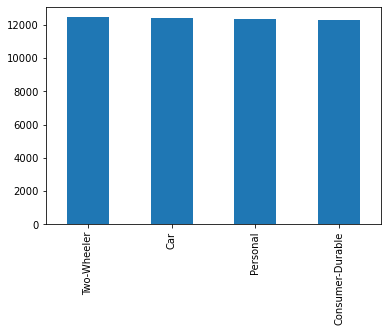

In [315]:
# Checking the distribution of loans by loan type
df_train["loan_type"].value_counts().plot.bar()


In terms of loan types all loan types have a equal distribution

<AxesSubplot:xlabel='number_of_loans', ylabel='Count'>

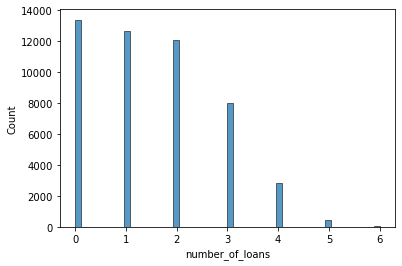

In [316]:
sns.histplot(df_train["number_of_loans"])

Majority of customers have 1- 3 loans, which shows that they are living off high credit

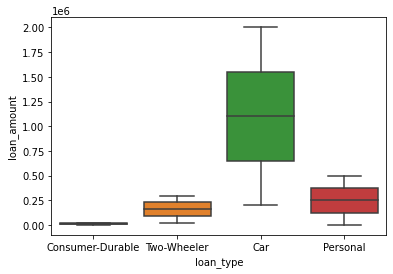

In [317]:
#Bivariate Analysis
sns.boxplot(data=df_train,y="loan_amount",x="loan_type")
plt.show()

The loan amount for car loans are the highest even though car loans contribute to ~25% of loans

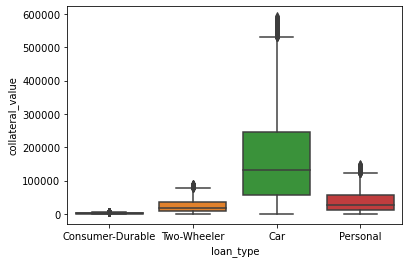

In [318]:
#Bivariate Analysis
sns.boxplot(data=df_train,y="collateral_value",x="loan_type")
plt.show()

Similar distribution for collateral values show that car loans require higher collateral (e.g. The car itself)

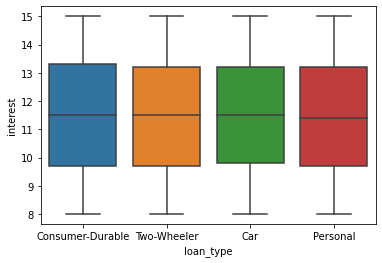

In [319]:
#Bivariate Analysis
sns.boxplot(data=df_train,y="interest",x="loan_type")
plt.show()

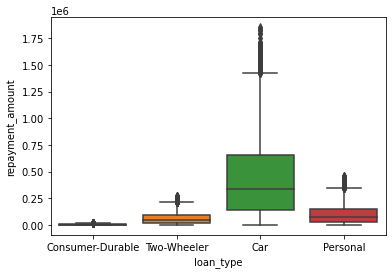

In [320]:
#Bivariate Analysis
sns.boxplot(data=df_train,y="repayment_amount",x="loan_type")
plt.show()

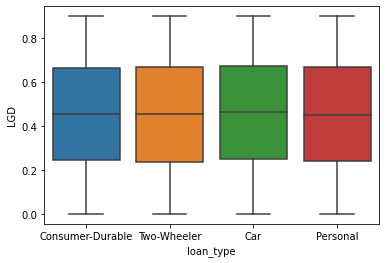

In [321]:
#Bivariate Analysis of target variable
sns.boxplot(data=df_train,y="LGD",x="loan_type")
plt.show()

Even though car loans have higher collateral and higher repayments, the LGD is same as other loans

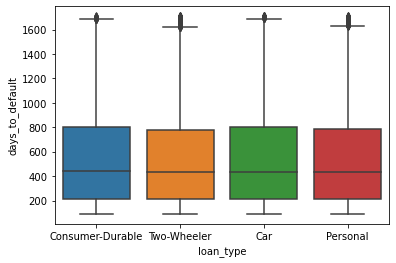

In [322]:
#Bivariate analysis
sns.boxplot(data=df_train,y="days_to_default",x="loan_type")
plt.show()

Customers take similar time to defualt on loans irrespective of loan type

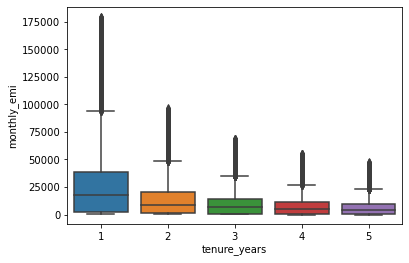

In [323]:
#Bivariate analysis
sns.boxplot(data=df_train,y="monthly_emi",x="tenure_years")
plt.show()

As expected longer loans have lower monthly emi

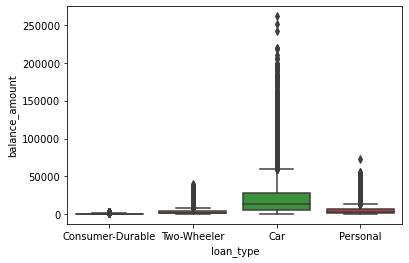

In [324]:
#Bivariate analysis
sns.boxplot(data=df_train,y="balance_amount",x="loan_type")
plt.show()

Customers with higher balance opt for car loans

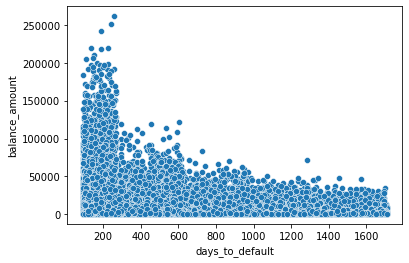

In [325]:
#Bivariate Analysis
sns.scatterplot(data=df_train,x="days_to_default",y="balance_amount")
plt.show()

There's an inverse relationship between average bank balance and time taken to default by a customer

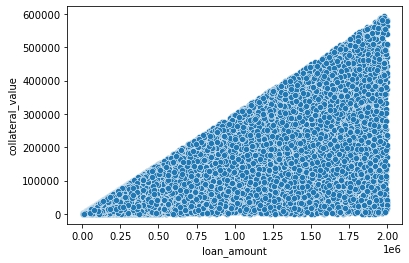

In [326]:
#Bivariate Analysis
sns.scatterplot(data=df_train,x="loan_amount",y="collateral_value")
plt.show()

Higher Loan amounts require higher collateral values

<AxesSubplot:>

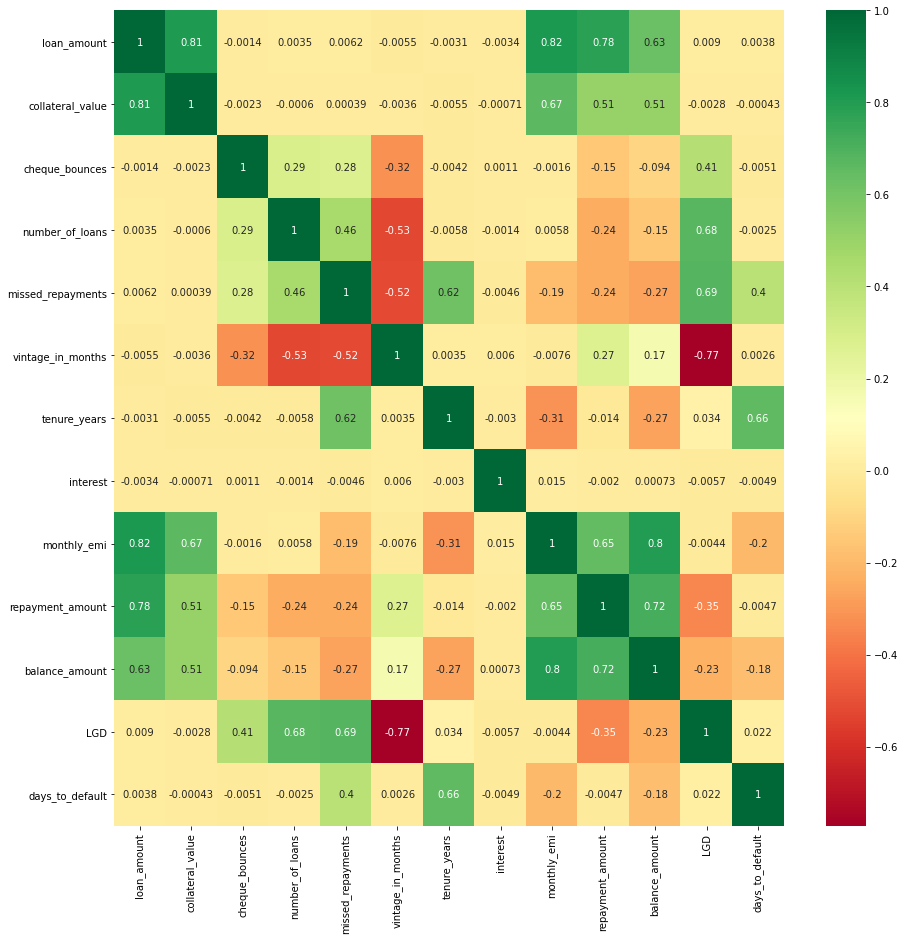

In [327]:
#Checking for correlation bewteen variables
plt.figure(figsize=[15,15])
sns.heatmap(df_train.corr(),cmap="RdYlGn",annot=True)

The above matrix shows that: 
1. Long term customers have lower missed repayments and lower LGDs which makes them better candidates for loans
2. Higher missed repayments, Number of loans,cheque bounces and LGD are positively correlated which shows that customers which have higher missed payments and #loans tend to greater loss 
3. Customers with higher bank balance tend to less loss at default


## Preparing train data for modelling

In [328]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49575 entries, 0 to 49984
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_type          49575 non-null  object 
 1   loan_amount        49575 non-null  int64  
 2   collateral_value   49575 non-null  float64
 3   cheque_bounces     49575 non-null  int64  
 4   number_of_loans    49575 non-null  int64  
 5   missed_repayments  49575 non-null  int64  
 6   vintage_in_months  49575 non-null  int64  
 7   tenure_years       49575 non-null  int64  
 8   interest           49575 non-null  float64
 9   monthly_emi        49575 non-null  float64
 10  repayment_amount   49575 non-null  float64
 11  balance_amount     49575 non-null  float64
 12  LGD                49575 non-null  float64
 13  days_to_default    49575 non-null  int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 6.7+ MB


In [329]:
#Converting the loan_type to dummy variables
dummy = pd.get_dummies(df_train['loan_type'],drop_first=True)

In [330]:
#Joining the dummy dataset
df_train=pd.concat([df_train,dummy],axis=1)

In [331]:
#Dropping the loan_type column
df_train= df_train.drop("loan_type",axis=1)

In [332]:
#Checking the train dataset
df_train.describe()

,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,repayment_amount,balance_amount,LGD,days_to_default,Consumer-Durable,Personal,Two-Wheeler
count,4.957500e+04,49575.000000,49575.000000,49575.000000,49575.000000,49575.000000,49575.000000,49575.000000,49575.000000,4.957500e+04,49575.000000,49575.000000,49575.000000,49575.000000,49575.000000,49575.000000
mean,3.815856e+05,57166.219422,1.766193,1.511770,9.826021,79.915098,2.998729,11.483609,16548.838168,1.509369e+05,7635.193584,0.451797,543.397741,0.248371,0.249319,0.251357
std,5.035225e+05,93355.556957,1.760519,1.259161,7.786010,44.101763,1.414348,2.019208,26607.423458,2.543506e+05,15984.746041,0.240193,395.351846,0.432073,0.432623,0.433797
min,2.000000e+03,0.070000,0.000000,0.000000,0.000000,15.000000,1.000000,8.000000,42.520000,0.000000e+00,0.096557,0.000103,90.000000,0.000000,0.000000,0.000000
25%,2.393950e+04,3331.045000,0.000000,0.000000,4.000000,44.000000,2.000000,9.700000,1156.560000,6.739956e+03,410.547985,0.243721,215.000000,0.000000,0.000000,0.000000
50%,1.927980e+05,19895.540000,1.000000,1.000000,8.000000,78.000000,3.000000,11.500000,6533.230000,4.844938e+04,2147.680468,0.455986,438.000000,0.000000,0.000000,0.000000
75%,4.333650e+05,62291.610000,3.000000,2.000000,15.000000,113.000000,4.000000,13.200000,19413.110000,1.666157e+05,7323.967647,0.667406,793.000000,0.000000,0.000000,1.000000
max,1.999992e+06,592545.710000,11.000000,6.000000,38.000000,258.000000,5.000000,15.000000,179521.680000,1.852111e+06,261799.895617,0.898372,1709.000000,1.000000,1.000000,1.000000


In [695]:
#Splitting the data into X and y variables
X_train=df_train.drop("LGD",axis=1)
y_train=df_train["LGD"]

In [696]:
#Scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [697]:
X_train.columns

Index(['loan_amount', 'collateral_value', 'cheque_bounces', 'number_of_loans',
       'missed_repayments', 'vintage_in_months', 'tenure_years', 'interest',
       'monthly_emi', 'repayment_amount', 'balance_amount', 'days_to_default',
       'Consumer-Durable', 'Personal', 'Two-Wheeler'],
      dtype='object')

In [698]:
#Scaling the data
X_train[['loan_amount', 'collateral_value', 'cheque_bounces', 'number_of_loans',
       'missed_repayments', 'vintage_in_months', 'tenure_years', 'interest',
       'monthly_emi', 'repayment_amount', 'balance_amount', 'days_to_default']]=scaler.fit_transform(X_train[['loan_amount', 'collateral_value', 'cheque_bounces', 'number_of_loans',
       'missed_repayments', 'vintage_in_months', 'tenure_years', 'interest',
       'monthly_emi', 'repayment_amount', 'balance_amount', 'days_to_default']])

In [699]:
y_train.describe()

count    49575.000000
mean         0.451797
std          0.240193
min          0.000103
25%          0.243721
50%          0.455986
75%          0.667406
max          0.898372
Name: LGD, dtype: float64

In [700]:
#Checking the data
X_train.describe()

,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,repayment_amount,balance_amount,days_to_default,Consumer-Durable,Personal,Two-Wheeler
count,49575.000000,49575.000000,49575.000000,49575.000000,49575.000000,49575.000000,49575.000000,49575.000000,49575.000000,49575.000000,49575.000000,49575.000000,49575.000000,49575.000000,49575.000000
mean,0.189984,0.096476,0.160563,0.251962,0.258580,0.267140,0.499682,0.497658,0.091968,0.081494,0.029164,0.280048,0.248371,0.249319,0.251357
std,0.252014,0.157550,0.160047,0.209860,0.204895,0.181489,0.353587,0.288458,0.148248,0.137330,0.061057,0.244195,0.432073,0.432623,0.433797
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.010981,0.005621,0.000000,0.000000,0.105263,0.119342,0.250000,0.242857,0.006207,0.003639,0.001568,0.077208,0.000000,0.000000,0.000000
50%,0.095495,0.033576,0.090909,0.166667,0.210526,0.259259,0.500000,0.500000,0.036164,0.026159,0.008203,0.214947,0.000000,0.000000,0.000000
75%,0.215899,0.105125,0.272727,0.333333,0.394737,0.403292,0.750000,0.742857,0.107927,0.089960,0.027975,0.434219,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


All variables have been scaled

## Preparing the test dataset

#### We will perform the same steps on test data to derive the required features and drop unncessary columns

In [763]:
#importing the datasets
df_test_main = pd.read_csv("test_main_loan_base.csv")
df_test_repayment = pd.read_csv("test_repayment_base.csv")
df_test_monthly_balance = pd.read_csv("test_monthly_balance_base.csv")

In [764]:
#Dropping Duplicates in loan_acc_num
df_test_main=df_test_main.drop_duplicates(subset="loan_acc_num")

In [765]:
df_test_main.head()

,loan_acc_num,customer_name,customer_address,loan_type,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,disbursal_date,default_date
0,LN14086568,Jayesh Kar,"83/65, Deo Circle\nBhagalpur-852841",Car,1259062,10184.09,3,1,5,103,1,12.1,111925.04,2014-11-23,2015-04-30
1,LN37082418,Kaira Chhabra,17\nSule Ganj\nAizawl 491897,Consumer-Durable,21731,2313.21,0,3,26,39,5,12.2,485.59,2014-01-11,2017-03-11
2,LN42963368,Anahita Bhargava,51/421\nKannan Chowk\nVaranasi-209999,Car,207660,8308.71,1,2,0,63,1,13.9,18635.42,2012-10-26,2013-06-23
3,LN54572294,Myra Samra,"22\nSubramanian Marg, Bhilai 850327",Two-Wheeler,193528,26432.24,4,3,12,15,2,12.5,9155.29,2021-10-07,2023-01-19
4,LN65792799,Arhaan Rana,"22, Kapoor Road\nJalandhar 667155",Consumer-Durable,5980,1641.66,1,1,0,152,1,14.6,538.62,2020-03-04,2020-10-08


In [766]:
#insepcting the repayment dataset
df_test_repayment.head()

,loan_acc_num,repayment_amount,repayment_date
0,LN14086568,111925.040000,2014-12-19
1,LN14086568,111925.040000,2015-01-26
2,LN14086568,111925.040000,2015-02-21
3,LN14086568,111925.040000,2015-03-20
4,LN14086568,11590.317813,2015-04-26


In [767]:
#Aggregating the repayment amount by loan account number
df_test_repayment=df_test_repayment.groupby('loan_acc_num')["repayment_amount"].sum()
df_test_repayment = pd.DataFrame({"loan_acc_num":df_test_repayment.index, "repayment_amount":df_test_repayment.values})
df_test_repayment.head()

,loan_acc_num,repayment_amount
0,LN10011015,1725.313355
1,LN10028091,3560.311180
2,LN10033713,11582.166773
3,LN10045654,66181.736267
4,LN10051605,87664.413068


In [768]:
#merging the main and repayment dataset
df_test = pd.merge(
    left=df_test_main,
    right=df_test_repayment,
    left_on='loan_acc_num',
    right_on='loan_acc_num',
    how='left'
)

In [769]:
df_test.head()

,loan_acc_num,customer_name,customer_address,loan_type,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,disbursal_date,default_date,repayment_amount
0,LN14086568,Jayesh Kar,"83/65, Deo Circle\nBhagalpur-852841",Car,1259062,10184.09,3,1,5,103,1,12.1,111925.04,2014-11-23,2015-04-30,675861.052902
1,LN37082418,Kaira Chhabra,17\nSule Ganj\nAizawl 491897,Consumer-Durable,21731,2313.21,0,3,26,39,5,12.2,485.59,2014-01-11,2017-03-11,2208.645810
2,LN42963368,Anahita Bhargava,51/421\nKannan Chowk\nVaranasi-209999,Car,207660,8308.71,1,2,0,63,1,13.9,18635.42,2012-10-26,2013-06-23,111812.520000
3,LN54572294,Myra Samra,"22\nSubramanian Marg, Bhilai 850327",Two-Wheeler,193528,26432.24,4,3,12,15,2,12.5,9155.29,2021-10-07,2023-01-19,18310.580000
4,LN65792799,Arhaan Rana,"22, Kapoor Road\nJalandhar 667155",Consumer-Durable,5980,1641.66,1,1,0,152,1,14.6,538.62,2020-03-04,2020-10-08,3428.641165


In [770]:
#Checking for nulls
null_perc= df_test.isnull().sum().sort_values(ascending=False)/len(df_test.index)*100
null_perc

repayment_amount     7.682305
loan_acc_num         0.000000
customer_name        0.000000
customer_address     0.000000
loan_type            0.000000
loan_amount          0.000000
collateral_value     0.000000
cheque_bounces       0.000000
number_of_loans      0.000000
missed_repayments    0.000000
vintage_in_months    0.000000
tenure_years         0.000000
interest             0.000000
monthly_emi          0.000000
disbursal_date       0.000000
default_date         0.000000
dtype: float64

In [771]:
#Replacing nulls
df_test=df_test.fillna(0)

In [772]:
#Aggregating the monthly balance by loan account number
df_test_monthly_balance=df_test_monthly_balance.groupby('loan_acc_num')['balance_amount'].mean()

In [773]:
df_test_monthly_balance.head()

loan_acc_num
LN10011015      25.088570
LN10028091      62.525212
LN10033713     182.411380
LN10045654    1838.350525
LN10051605    3374.170053
Name: balance_amount, dtype: float64

In [774]:
#merging the train and monthly balance dataset
df_test = pd.merge(
    left=df_test,
    right=df_test_monthly_balance,
    left_on='loan_acc_num',
    right_on='loan_acc_num',
    how='left'
)

In [775]:
df_test.head()

,loan_acc_num,customer_name,customer_address,loan_type,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,disbursal_date,default_date,repayment_amount,balance_amount
0,LN14086568,Jayesh Kar,"83/65, Deo Circle\nBhagalpur-852841",Car,1259062,10184.09,3,1,5,103,1,12.1,111925.04,2014-11-23,2015-04-30,675861.052902,26560.585984
1,LN37082418,Kaira Chhabra,17\nSule Ganj\nAizawl 491897,Consumer-Durable,21731,2313.21,0,3,26,39,5,12.2,485.59,2014-01-11,2017-03-11,2208.645810,80.712017
2,LN42963368,Anahita Bhargava,51/421\nKannan Chowk\nVaranasi-209999,Car,207660,8308.71,1,2,0,63,1,13.9,18635.42,2012-10-26,2013-06-23,111812.520000,15501.249720
3,LN54572294,Myra Samra,"22\nSubramanian Marg, Bhilai 850327",Two-Wheeler,193528,26432.24,4,3,12,15,2,12.5,9155.29,2021-10-07,2023-01-19,18310.580000,2806.721974
4,LN65792799,Arhaan Rana,"22, Kapoor Road\nJalandhar 667155",Consumer-Durable,5980,1641.66,1,1,0,152,1,14.6,538.62,2020-03-04,2020-10-08,3428.641165,673.018752


In [776]:
#Checking for nulls
null_perc= df_test.isnull().sum().sort_values(ascending=False)/len(df_test.index)*100
null_perc

balance_amount       0.570171
vintage_in_months    0.000000
repayment_amount     0.000000
default_date         0.000000
disbursal_date       0.000000
monthly_emi          0.000000
interest             0.000000
tenure_years         0.000000
loan_acc_num         0.000000
customer_name        0.000000
number_of_loans      0.000000
cheque_bounces       0.000000
collateral_value     0.000000
loan_amount          0.000000
loan_type            0.000000
customer_address     0.000000
missed_repayments    0.000000
dtype: float64

In [777]:
# Removing the nulls from the dataframe
df_test=df_test.dropna()

In [778]:
#Calculating the target  variable 
df_test['LGD'] = (df_test['loan_amount'] - (df_test['collateral_value'] + df_test['repayment_amount'])) / df_test['loan_amount']

In [779]:
df_test = df_test[df_test['LGD'] >= 0]

In [780]:
df_test.describe()

,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,repayment_amount,balance_amount,LGD
count,9.918000e+03,9918.000000,9918.000000,9918.000000,9918.000000,9918.000000,9918.000000,9918.000000,9918.000000,9.918000e+03,9918.000000,9918.000000
mean,3.827339e+05,57841.127977,1.763460,1.502420,9.742589,79.996068,2.992740,11.511474,16589.329126,1.530098e+05,7646.420428,0.448900
std,5.007372e+05,93274.665976,1.783567,1.260129,7.668617,43.542479,1.413196,2.012211,26349.498314,2.541952e+05,15322.388091,0.238735
min,2.009000e+03,1.160000,0.000000,0.000000,0.000000,15.000000,1.000000,8.000000,45.520000,0.000000e+00,1.590481,0.000780
25%,2.407500e+04,3338.812500,0.000000,0.000000,4.000000,45.000000,2.000000,9.800000,1158.697500,6.921822e+03,433.492533,0.245286
50%,1.965420e+05,20364.375000,1.000000,1.000000,8.000000,79.000000,3.000000,11.500000,6673.340000,4.974993e+04,2220.853842,0.448757
75%,4.348158e+05,64189.637500,3.000000,2.000000,14.000000,112.000000,4.000000,13.200000,19559.632500,1.671279e+05,7537.811612,0.661967
max,1.998735e+06,591419.920000,10.000000,6.000000,35.000000,235.000000,5.000000,15.000000,177491.690000,1.772722e+06,222997.614259,0.894842


In [781]:
#Converting the date variables to date format
df_test['default_date'] = pd.to_datetime(df_test['default_date'], format='%Y-%m-%d')
df_test['disbursal_date'] = pd.to_datetime(df_test['disbursal_date'], format='%Y-%m-%d')

In [782]:
#Calculating the days to default for each customer
df_test['days_to_default'] = (df_test['default_date'] - df_test['disbursal_date']).dt.days

In [783]:
df_test_copy=df_test

In [784]:
#Dropping some of the columns which are not required for modelling
df_test=df_test.drop(["loan_acc_num","customer_name","customer_address","disbursal_date","default_date"],axis=1)

In [785]:
#Checking the test dataset
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9918 entries, 0 to 9996
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_type          9918 non-null   object 
 1   loan_amount        9918 non-null   int64  
 2   collateral_value   9918 non-null   float64
 3   cheque_bounces     9918 non-null   int64  
 4   number_of_loans    9918 non-null   int64  
 5   missed_repayments  9918 non-null   int64  
 6   vintage_in_months  9918 non-null   int64  
 7   tenure_years       9918 non-null   int64  
 8   interest           9918 non-null   float64
 9   monthly_emi        9918 non-null   float64
 10  repayment_amount   9918 non-null   float64
 11  balance_amount     9918 non-null   float64
 12  LGD                9918 non-null   float64
 13  days_to_default    9918 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.1+ MB


In [786]:
#Converting the loan_type to dummy variables
dummy = pd.get_dummies(df_test['loan_type'],drop_first=True)

#Joining the dummy dataset
df_test=pd.concat([df_test,dummy],axis=1)

#Dropping the loan_type column
df_test= df_test.drop("loan_type",axis=1)

#Checking the train dataset
df_test.describe()

,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,repayment_amount,balance_amount,LGD,days_to_default,Consumer-Durable,Personal,Two-Wheeler
count,9.918000e+03,9918.000000,9918.000000,9918.000000,9918.000000,9918.000000,9918.000000,9918.000000,9918.000000,9.918000e+03,9918.000000,9918.000000,9918.000000,9918.000000,9918.000000,9918.000000
mean,3.827339e+05,57841.127977,1.763460,1.502420,9.742589,79.996068,2.992740,11.511474,16589.329126,1.530098e+05,7646.420428,0.448900,532.663541,0.245715,0.248639,0.256302
std,5.007372e+05,93274.665976,1.783567,1.260129,7.668617,43.542479,1.413196,2.012211,26349.498314,2.541952e+05,15322.388091,0.238735,387.450568,0.430532,0.432246,0.436612
min,2.009000e+03,1.160000,0.000000,0.000000,0.000000,15.000000,1.000000,8.000000,45.520000,0.000000e+00,1.590481,0.000780,90.000000,0.000000,0.000000,0.000000
25%,2.407500e+04,3338.812500,0.000000,0.000000,4.000000,45.000000,2.000000,9.800000,1158.697500,6.921822e+03,433.492533,0.245286,214.000000,0.000000,0.000000,0.000000
50%,1.965420e+05,20364.375000,1.000000,1.000000,8.000000,79.000000,3.000000,11.500000,6673.340000,4.974993e+04,2220.853842,0.448757,426.000000,0.000000,0.000000,0.000000
75%,4.348158e+05,64189.637500,3.000000,2.000000,14.000000,112.000000,4.000000,13.200000,19559.632500,1.671279e+05,7537.811612,0.661967,768.000000,0.000000,0.000000,1.000000
max,1.998735e+06,591419.920000,10.000000,6.000000,35.000000,235.000000,5.000000,15.000000,177491.690000,1.772722e+06,222997.614259,0.894842,1709.000000,1.000000,1.000000,1.000000


In [787]:
#Splitting the data into X and y variables
X_test=df_test.drop("LGD",axis=1)
y_test=df_test["LGD"]

In [788]:
#Scaling the data
X_test[['loan_amount', 'collateral_value', 'cheque_bounces', 'number_of_loans',
       'missed_repayments', 'vintage_in_months', 'tenure_years', 'interest',
       'monthly_emi', 'repayment_amount', 'balance_amount', 'days_to_default']]=scaler.transform(X_test[['loan_amount', 'collateral_value', 'cheque_bounces', 'number_of_loans',
       'missed_repayments', 'vintage_in_months', 'tenure_years', 'interest',
       'monthly_emi', 'repayment_amount', 'balance_amount', 'days_to_default']])


In [789]:
#Checking the data
X_test.describe()

,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,repayment_amount,balance_amount,days_to_default,Consumer-Durable,Personal,Two-Wheeler
count,9918.000000,9918.000000,9918.000000,9918.000000,9918.000000,9918.000000,9918.000000,9918.000000,9918.000000,9918.000000,9918.000000,9918.000000,9918.000000,9918.000000,9918.000000
mean,0.190558,0.097615,0.160315,0.250403,0.256384,0.267474,0.498185,0.501639,0.092193,0.082614,0.029207,0.273418,0.245715,0.248639,0.256302
std,0.250620,0.157413,0.162142,0.210021,0.201806,0.179187,0.353299,0.287459,0.146811,0.137246,0.058527,0.239315,0.430532,0.432246,0.436612
min,0.000005,0.000002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000017,0.000000,0.000006,0.000000,0.000000,0.000000,0.000000
25%,0.011049,0.005635,0.000000,0.000000,0.105263,0.123457,0.250000,0.257143,0.006219,0.003737,0.001655,0.076590,0.000000,0.000000,0.000000
50%,0.097369,0.034367,0.090909,0.166667,0.210526,0.263374,0.500000,0.500000,0.036945,0.026861,0.008483,0.207536,0.000000,0.000000,0.000000
75%,0.216625,0.108328,0.272727,0.333333,0.368421,0.399177,0.750000,0.742857,0.108743,0.090236,0.028792,0.418777,0.000000,0.000000,1.000000
max,0.999371,0.998100,0.909091,1.000000,0.921053,0.905350,1.000000,1.000000,0.988690,0.957136,0.851786,1.000000,1.000000,1.000000,1.000000


# Building Predictive models for LGD- Multiple Linear Regression

We will be using the LinearRegression function from SciKit Learn along with RFE to select the variables

In [790]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [791]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [792]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('loan_amount', True, 1),
 ('collateral_value', True, 1),
 ('cheque_bounces', True, 1),
 ('number_of_loans', True, 1),
 ('missed_repayments', True, 1),
 ('vintage_in_months', True, 1),
 ('tenure_years', True, 1),
 ('interest', False, 2),
 ('monthly_emi', True, 1),
 ('repayment_amount', True, 1),
 ('balance_amount', True, 1),
 ('days_to_default', False, 3),
 ('Consumer-Durable', False, 4),
 ('Personal', False, 5),
 ('Two-Wheeler', False, 6)]

In [793]:
col = X_train.columns[rfe.support_]
col

Index(['loan_amount', 'collateral_value', 'cheque_bounces', 'number_of_loans',
       'missed_repayments', 'vintage_in_months', 'tenure_years', 'monthly_emi',
       'repayment_amount', 'balance_amount'],
      dtype='object')

As next steps we will build the model using stats model to better capture statistics

In [794]:
X_train_lr=X_train[col]

In [795]:
# Importing statsmodel and adding a constant variable 
import statsmodels.api as sm  
X_train_sm = sm.add_constant(X_train_lr)

In [796]:
lm = sm.OLS(y_train,X_train_sm).fit()   # Running the linear model

In [797]:
# Checking the summary of the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    LGD   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                 2.753e+04
Date:                Sat, 20 Jan 2024   Prob (F-statistic):               0.00
Time:                        19:32:20   Log-Likelihood:                 46969.
No. Observations:               49575   AIC:                        -9.392e+04
Df Residuals:                   49564   BIC:                        -9.382e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.4155      0.00

- the model has an adjusted R squared of .847 which shows that the model is able to explain ~85% of the variance which is good
- the Prob (F-statistic) is ~ 0 which shows that the overall model fit is significant
- All p values are significant
- we will look into the VIF of each of the variables and check

In [798]:
#Check the VIF of all the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Predictors'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Predictors,VIF
0,loan_amount,22.32
6,tenure_years,10.68
8,monthly_emi,10.41
4,missed_repayments,9.31
9,repayment_amount,8.20
10,balance_amount,5.70
1,collateral_value,4.97
5,vintage_in_months,4.88
11,days_to_default,4.05
3,number_of_loans,3.71


The loan amount column has a high VIF but we won't be dropping it considering it's an important factor

## Residual Analysis of the model

In [799]:
y_train_pred=lm.predict(X_train_sm)

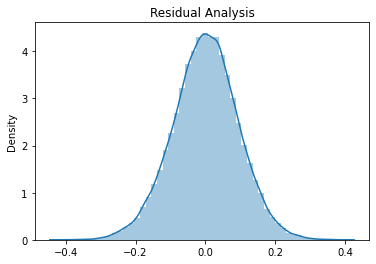

In [800]:
res=y_train-y_train_pred
sns.distplot(res)
plt.title("Residual Analysis")
plt.show()

The Residual analysis is normally distributed with a mean of 0 which shows that the model is a good fit

### Evaluating on test dataset

In [801]:
#dropping the insignificant columns from test data
X_test_lr=X_test[X_train_lr.columns]

In [802]:
#checling the columns
X_test_lr.columns

Index(['loan_amount', 'collateral_value', 'cheque_bounces', 'number_of_loans',
       'missed_repayments', 'vintage_in_months', 'tenure_years', 'monthly_emi',
       'repayment_amount', 'balance_amount'],
      dtype='object')

In [803]:
# Adding the constant
X_test_sm=sm.add_constant(X_test_lr)

In [804]:
X_test_sm

,const,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,monthly_emi,repayment_amount,balance_amount
0,1.0,0.629163,0.017187,0.272727,0.166667,0.131579,0.362140,0.00,0.623373,0.364914,0.101453
1,1.0,0.009875,0.003904,0.000000,0.500000,0.684211,0.098765,1.00,0.002469,0.001193,0.000308
2,1.0,0.102933,0.014022,0.090909,0.333333,0.000000,0.197531,0.00,0.103594,0.060370,0.059210
3,1.0,0.095860,0.044608,0.363636,0.500000,0.315789,0.000000,0.25,0.050773,0.009886,0.010721
4,1.0,0.001992,0.002770,0.090909,0.166667,0.000000,0.563786,0.00,0.002764,0.001851,0.002570
...,...,...,...,...,...,...,...,...,...,...,...
9992,1.0,0.193787,0.196367,0.090909,0.000000,0.210526,0.378601,0.75,0.053313,0.094444,0.014041
9993,1.0,0.075706,0.040407,0.181818,0.333333,0.157895,0.185185,0.00,0.076434,0.007430,0.013346
9994,1.0,0.004352,0.001618,0.000000,0.166667,0.052632,0.604938,0.75,0.001243,0.004958,0.000911
9995,1.0,0.003097,0.002463,0.000000,0.166667,0.131579,0.502058,0.50,0.001322,0.002852,0.001267


In [805]:
#Predicting the y_test 
y_test_pred= lm.predict(X_test_sm)

In [806]:
#Importing r2_score
from sklearn.metrics import r2_score
#Evaluating the test model
print(r2_score(y_test,y_test_pred))

0.8461938439163538


The r2 score on the test set is ~.846 which is close to the train R2 and shows that the model is a good predictor of LGD

# Building Predictive models for LGD- Random Forest Regressor

In [807]:
# Importing Randomforest Regressor
from sklearn.ensemble import RandomForestRegressor

In [808]:
# Running RFE with the output number of the variable equal to 10
rf = RandomForestRegressor(random_state=42, n_estimators=50, oob_score=True)

In [809]:
rfe = RFE(rf, n_features_to_select=10)             # running RFE

In [810]:
rfe.fit(X_train, y_train)

RFE(estimator=RandomForestRegressor(n_estimators=50, oob_score=True,
                                    random_state=42),
    n_features_to_select=10)

In [811]:
#Checking the important columns
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('loan_amount', True, 1),
 ('collateral_value', True, 1),
 ('cheque_bounces', False, 3),
 ('number_of_loans', True, 1),
 ('missed_repayments', True, 1),
 ('vintage_in_months', True, 1),
 ('tenure_years', True, 1),
 ('interest', True, 1),
 ('monthly_emi', True, 1),
 ('repayment_amount', True, 1),
 ('balance_amount', False, 2),
 ('days_to_default', True, 1),
 ('Consumer-Durable', False, 6),
 ('Personal', False, 4),
 ('Two-Wheeler', False, 5)]

In [812]:
col = X_train.columns[rfe.support_]
col

Index(['loan_amount', 'collateral_value', 'number_of_loans',
       'missed_repayments', 'vintage_in_months', 'tenure_years', 'interest',
       'monthly_emi', 'repayment_amount', 'days_to_default'],
      dtype='object')

In [813]:
X_train_rf=X_train[col]

## Hyperparameter Tuning using Randomized Search

In [814]:
#Importing Randomized Search
from sklearn.model_selection import RandomizedSearchCV

In [815]:
#Setting the hyperparameters
hyper_params = {'max_depth': range(3, 20),
                'max_features': range(3, 17),
                'min_samples_leaf': range(20, 400, 50),
                'n_estimators': range(10, 101, 10)}

In [816]:
model_rcv = RandomizedSearchCV(estimator=rf, 
                              param_distributions=hyper_params,
                              verbose=1,
                              cv=5,
                              return_train_score=True,
                              n_jobs=-1,
                              n_iter=50)

In [817]:
#Fitting the model
model_rcv.fit(X_train_rf, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_estimators=50,
                                                   oob_score=True,
                                                   random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': range(3, 20),
                                        'max_features': range(3, 17),
                                        'min_samples_leaf': range(20, 400, 50),
                                        'n_estimators': range(10, 101, 10)},
                   return_train_score=True, verbose=1)

In [818]:
#Checking the best score
model_rcv.best_score_

0.9005333753274531

In [819]:
#Selecting the best model
rf_best = model_rcv.best_estimator_

In [820]:
rf_best

RandomForestRegressor(max_depth=19, max_features=6, min_samples_leaf=20,
                      n_estimators=60, oob_score=True, random_state=42)

## Evaluating on test data

In [821]:
X_test_rf=X_test[X_train_rf.columns]

In [822]:
#Predicting the y_test 
y_test_pred_rf= rf_best.predict(X_test_rf)

In [823]:
#Evaluating the test model
print(r2_score(y_test,y_test_pred_rf))

0.9025455848511335


The R2 score on the randomforest model for test dataset is .9 which is shows that the model performs better on the test data using the randomforest model

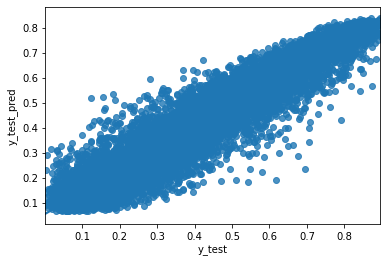

In [834]:
#Plotting the y_pred vs y_test

sns.regplot(x=y_test,y=y_test_pred_rf)
plt.xlabel("y_test")
plt.ylabel("y_test_pred")
plt.show()

In [831]:
#Making predictions
LGD_df = rf_best.predict(X_test_rf)
LGD_df = pd.Series(LGD_df)

In [832]:
#Combining the results into dataframe
LGD_df = pd.DataFrame({'loan_acc_num':df_test_copy['loan_acc_num'].values, 'LGD_pred':LGD_df.values})

In [833]:
LGD_df.head()

,loan_acc_num,LGD_pred
0,LN14086568,0.367459
1,LN37082418,0.730996
2,LN42963368,0.396732
3,LN54572294,0.771631
4,LN65792799,0.155487


### Conclusions
- We developed multiple regression models: MLR and RF to calculate LGD
- The RF model is a better predictor of LGD with given input variables
- We have hypertuned the parameters of the RF model and the rf_best is what we have selected as final model